### Edgar Moises Hernandez-Gonzalez
#### 12/12/19-06/04/20
#### Clasificacion de RAW de MI-EEG con CNN-2D + LSTM
##### 10 ejecuciones independientes para obtener la media y desviacion estandar

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv2D, MaxPool2D, Flatten, LSTM, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [ ]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/MI-EEG-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/MI-EEG-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/EtiquetasA01E.csv", header=None)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22000)
(288, 22000)
(288, 1)
(288, 1)


In [ ]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [ ]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [ ]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 1, 22, 1000, 1))
x_test = x_test.reshape((n_samples_test, 1, 22, 1000, 1))

print(x_train.shape)
print(x_test.shape)

(288, 1, 22, 1000, 1)
(288, 1, 22, 1000, 1)


Iteration: 1
9/9 [==============================] - 0s 4ms/step - loss: 1.4596 - accuracy: 0.2639
kappa:  0.01851851851851849
confusion matrix:
 [[ 6  2 36 28]
 [ 6  2 28 36]
 [ 8  2 39 23]
 [ 6  1 36 29]]
(0.26176476401296545, 0.26388888888888884, 0.21281519393190296, None)


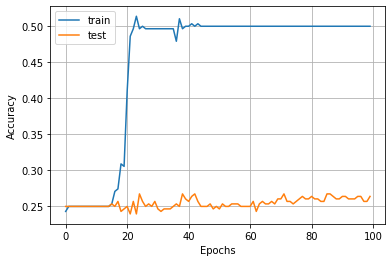

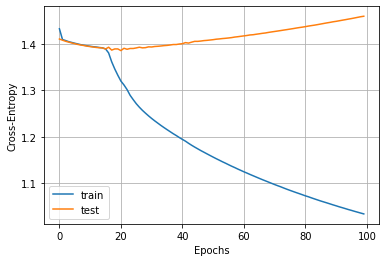

Iteration: 2
9/9 [==============================] - 0s 4ms/step - loss: 1.9374 - accuracy: 0.3646
kappa:  0.1527777777777778
confusion matrix:
 [[26 27 12  7]
 [37 23  7  5]
 [19  6 20 27]
 [ 9  8 19 36]]
(0.3674792179802956, 0.36458333333333337, 0.3636854812713193, None)


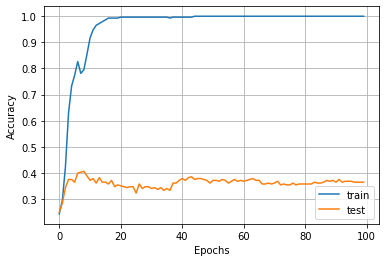

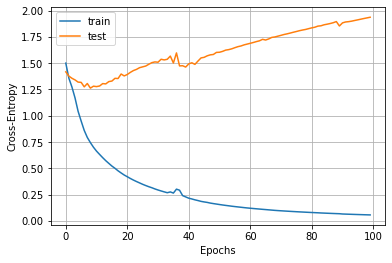

Iteration: 3
9/9 [==============================] - 0s 4ms/step - loss: 1.2115 - accuracy: 0.3958
kappa:  0.19444444444444442
confusion matrix:
 [[59  1 11  1]
 [63  4  5  0]
 [21  4 45  2]
 [13  3 50  6]]
(0.44590263340263336, 0.3958333333333333, 0.3131833454309727, None)


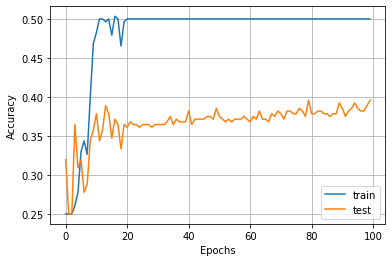

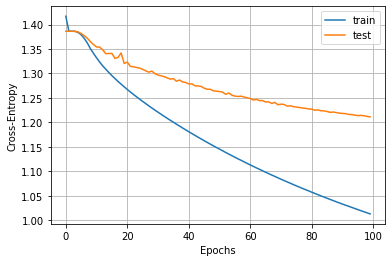

Iteration: 4
9/9 [==============================] - 0s 4ms/step - loss: 1.3863 - accuracy: 0.2500
kappa:  0.0
confusion matrix:
 [[ 0  0  0 72]
 [ 0  0  0 72]
 [ 0  0  0 72]
 [ 0  0  0 72]]
(0.0625, 0.25, 0.1, None)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


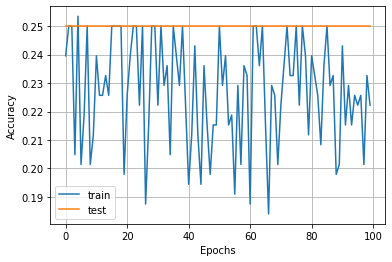

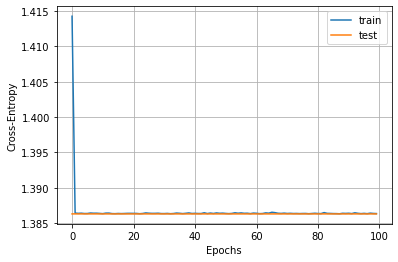

Iteration: 5
9/9 [==============================] - 0s 4ms/step - loss: 1.7595 - accuracy: 0.2917
kappa:  0.05555555555555558
confusion matrix:
 [[14 36  5 17]
 [19 27  2 24]
 [12 25  1 34]
 [12 18  0 42]]
(0.24607634379853843, 0.29166666666666663, 0.2474673736317975, None)


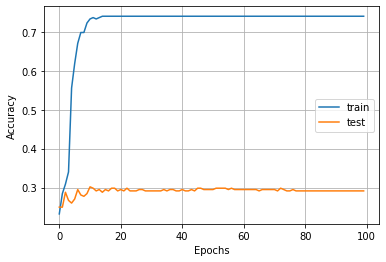

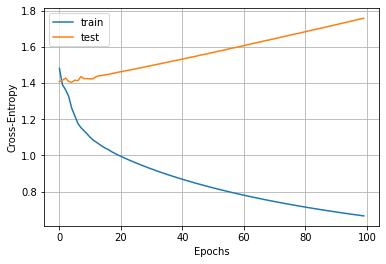


Resultados:
loss: [1.4595648050308228, 1.9374332427978516, 1.211471676826477, 1.3862947225570679, 1.7595213651657104]
accuracy: [0.2638888955116272, 0.3645833432674408, 0.3958333432674408, 0.25, 0.2916666567325592]
kappa: [0.01851851851851849, 0.1527777777777778, 0.19444444444444442, 0.0, 0.05555555555555558]
precision: [0.26176476401296545, 0.3674792179802956, 0.44590263340263336, 0.0625, 0.24607634379853843]
recall: [0.26388888888888884, 0.36458333333333337, 0.3958333333333333, 0.25, 0.29166666666666663]
f1: [0.21281519393190296, 0.3636854812713193, 0.3131833454309727, 0.1, 0.2474673736317975]


In [ ]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(5):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(TimeDistributed(Conv2D(8, (3,3), activation='relu'),
                              input_shape=(1,22,1000,1)))
    model.add(TimeDistributed(MaxPool2D((2,2))))
    model.add(TimeDistributed(Conv2D(16, (3,3), activation='relu')))
    model.add(TimeDistributed(MaxPool2D((2,2))))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(16))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_46 (TimeDis (None, 1, 20, 998, 8)     80        
_________________________________________________________________
time_distributed_47 (TimeDis (None, 1, 10, 499, 8)     0         
_________________________________________________________________
time_distributed_48 (TimeDis (None, 1, 8, 497, 16)     1168      
_________________________________________________________________
time_distributed_49 (TimeDis (None, 1, 4, 248, 16)     0         
_________________________________________________________________
time_distributed_50 (TimeDis (None, 1, 15872)          0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 16)                1016896   
_________________________________________________________________
dense_9 (Dense)              (None, 4)               

In [ ]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("std: %.4f" % np.std(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.3132
std: (+/- 0.0572)
kappa: 0.0843
std: 0.0763
precision: 0.2767
recall: 0.3132
f1: 0.2474
